# Conformer Generation in the Molecule Club

In [1]:
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import rdMolAlign
from rdkit.Chem.Draw import IPythonConsole

from molclub.conf_tools import etkdg, conf_utils
from molclub.compute import gfnff, gfnxtb
from molclub import visualize

## Conformer initialization using RDKit's ETKDG

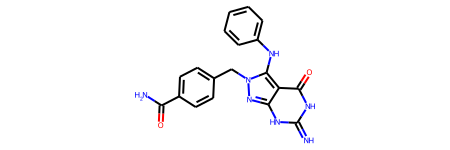

In [2]:
smi = 'NC(=O)C1=CC=C(CN2N=C3NC(=N)NC(=O)C3=C2NC2=CC=CC=C2)C=C1'
mol = Chem.MolFromSmiles(smi)
mol

there are 103 mols


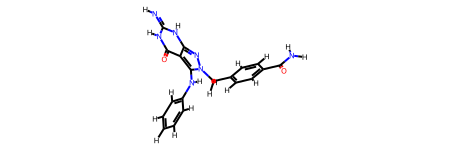

In [4]:
mols = etkdg.generate_conformers(mol, num_confs='auto', num_threads=4)
print(f'there are {len(mols)} mols')
display(mols[0])

## Geometry optimization with xtb's GFNFF

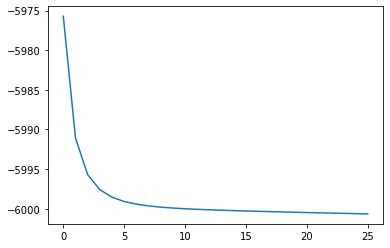

In [5]:
mol = mols[0]
steps, energies = gfnff.opt_traj(mol, 25, 4)

plt.plot(steps, energies)

In [6]:
mols_energies = [gfnff.opt(mol, num_threads=4) for mol in mols]
mols = [m_e[0] for m_e in mols_energies]
energies = [m_e[1] for m_e in mols_energies]

In [7]:
mols, energies = conf_utils.order_confs(mols, None, energies=energies)
energies[:5]

[-6069.230649441228,
 -6069.197532702655,
 -6005.053912787075,
 -6004.927348863335,
 -6004.8364855104455]

In [8]:
print(len(mols))
mols, energies = conf_utils.prune(mols, energies)
print(len(mols))

103
49


# Now again with xtb instead of a force-field

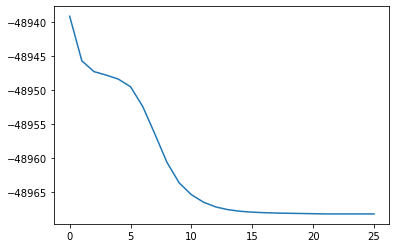

In [9]:
mol = mols[0]
steps, energies = gfnxtb.opt_traj(mol, max_iters=25, num_threads=4)

plt.plot(steps, energies)

In [10]:
mols_energies = [gfnxtb.opt(mol, num_threads=4) for mol in mols]

mols = [m_e[0] for m_e in mols_energies]
energies = [m_e[1] for m_e in mols_energies]

mols, energies = conf_utils.order_confs(mols, None, energies=energies)

In [11]:
print(len(mols))
mols, energies = conf_utils.prune(mols, energies)
print(len(mols))

49
40


In [14]:
boltzmann_pops = conf_utils.boltzmann_pop(energies)
print(len(mols))
mols = mols[:len(boltzmann_pops)]
energies = energies[:len(boltzmann_pops)]
print(len(mols))

40
11


In [15]:
boltzmann_pops

[0.17479076912346683,
 0.13049822436630737,
 0.12449629222282703,
 0.10104786365891726,
 0.09708752407351415,
 0.09272699734457913,
 0.06635432242290779,
 0.06076904723473954,
 0.05139628929008614,
 0.05124665086216558,
 0.04958601940048921]

In [16]:
rmsd = conf_utils.align_confs(mols[1:], mols[0])
print(rmsd)

[0.0, 0.3154164612663321, 2.5672622303771724, 0.6463062046338429, 2.6335778010340025, 2.55181006945744, 2.585034859966197, 2.6157908813404687, 0.4714623986790605, 2.669426356142622, 0.8169484744448972]


In [17]:
for mol in mols[1:]:
    visualize.mols([mols[0], mol])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol